# QC report: HILICpos Rafi only samples (R5pos, R5neg & Naive)
- Minghao Gong; 07/27/2022
- This notebook specifically fits Asari run
- run with deduplicated samples (technical removed)

# Load libraries

In [2]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [7]:
#load libraries 
shhh <- suppressPackageStartupMessages # It's a library, so shhh!
shhh(library(FactoMineR))
shhh(library(factoextra))
shhh(library(reshape2))
shhh(library(tidyverse))
shhh(library(RColorBrewer))
shhh(library(gridExtra))
shhh(library(pheatmap))
library(repr)#jupyter notebook R ; image manipulation 
#shhh(library(devtools))
#install_github("vqv/ggbiplot")
shhh(library(ggbiplot))
options(warn=-1)#dont show warnings in Output 
options(digits = 14) # Or any higher number; fixing decimal places

library("rjson")

source('./utilis/utlis_MQC.R')

# Read tables

## load Metadata & feature table
- Here first use the peak Area table

# !!! What meta/feature/filtered tables in use?
- HILICpos

In [5]:
meta_path <- "../../input/sequence_file/clean_meta_df.csv"
featab_path <- "../../output/preprocessing_59/groupFil0.3_HILICpos_featab.csv"


#### Read metadata table

In [38]:
# metadata information
meta_df <- read_csv(meta_path)

Rows: 24 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): tID, Sample ID, tID_dedup, class, biological_samples
dbl (2): index, cell_number

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
head(meta_df)

index,tID,Sample ID,tID_dedup,class,biological_samples,cell_number
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,nist_2,nist_2,nist,nist,No,NA
3,nist_4,nist_4,nist,nist,No,NA
5,nist_6,nist_6,nist,nist,No,NA
13,q3June2014_1b,q3June2014_1b_2,q3June2014_1,q3June2014,No,NA
15,q3June2014_1b,q3June2014_1b_4,q3June2014_1,q3June2014,No,NA
17,q3June2014_1b,q3June2014_1b_6,q3June2014_1,q3June2014,No,NA


#### Read in the feature table
- Of note, since it is using tibble, row.names are suppressed; `COMP ID` comes as the first columns

In [11]:
asari_df <- read_delim(featab_path,delim = ',')

Rows: 4370 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): id_number
dbl (28): mz, rtime, rtime_left_base, rtime_right_base, parent_masstrack_id,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [12]:
asari2data_feat_df_regExpr <- function(asari_df,regExpr_sample_cols) {
    sample_col_index = grep(regExpr_sample_cols,colnames(asari_df))
    featab_df = asari_df[,c(1,sample_col_index)]
    return(featab_df)
}

asari2data_feat_df_index <- function(asari_df,end_index = 11) {
    featab_df = asari_df[,c(1,end_index:ncol(asari_df))]
    return(featab_df)
}

In [13]:
featab_df = asari2data_feat_df_regExpr(asari_df,"Naive\\_[0-9]|R5pos\\_[0-9]|R5neg\\_[0-9]")

In [14]:
dim(featab_df)

[1] 4370   10

In [15]:
head(featab_df) # examine the table

id_number,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F1,27701,94249,89481,112257.0,125058.5,117895.0,NA,43734,22457
F4,18042890,23587830,23522578,37977006.0,31336873.5,41664549.5,12798823,15422758,17903307
F20,131751,445307,75659,247920.5,271441.0,156271.5,83564,145807,170846
F24,71436,69595,287939,314947.0,231693.5,348396.5,NA,NA,188441
F25,1586601,3078699,2724799,5243289.5,4150817.5,5506156.0,NA,1334698,1406772
F51,1227589,2288467,1607600,859643.5,1212530.0,977404.5,NA,1036810,944133


### subset metadatabased on feature table
- make sure the below list is matchable at least subsets

In [40]:
colnames(featab_df)

[1] "id_number" "Naive_1"   "Naive_2"   "Naive_3"   "R5neg_1"   "R5neg_2"  
 [7] "R5neg_3"   "R5pos_1"   "R5pos_2"   "R5pos_3"

In [41]:
pull(meta_df['tID_dedup']) # tibble column needs to pull out into vector

[1] "nist"         "nist"         "nist"         "q3June2014_1" "q3June2014_1"
 [6] "q3June2014_1" "R5pos_1"      "R5pos_2"      "R5pos_3"      "Naive_1"     
[11] "Naive_2"      "Naive_3"      "R5neg_1"      "R5neg_1"      "R5neg_2"     
[16] "R5neg_2"      "R5neg_3"      "R5neg_3"      "q3June2014_2" "q3June2014_2"
[21] "q3June2014_2" "q3June2014_2" "q3June2014_2" "q3June2014_2"

In [42]:
meta_df = meta_df[pull(meta_df['tID_dedup']) %in% colnames(featab_df),]

In [44]:
dim(meta_df)

[1] 12  7

In [45]:
head(meta_df)

index,tID,Sample ID,tID_dedup,class,biological_samples,cell_number
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
19,R5pos_1,G2_R5pos_1_142_2,R5pos_1,R5pos,Yes,142
21,R5pos_2,G2_R5pos_2_200_2,R5pos_2,R5pos,Yes,200
23,R5pos_3,G2_R5pos_3_150_2,R5pos_3,R5pos,Yes,150
25,Naive_1,G1_Naive_1_300_2,Naive_1,Naive,Yes,300
27,Naive_2,G1_Naive_2_300_2,Naive_2,Naive,Yes,300
29,Naive_3,G1_Naive_3_300_2,Naive_3,Naive,Yes,300


#### procedure for preoprocessing of data
- log2-transformation (currently the missing data is denoted by NA)
- Analysis the TIC
- Correlation heatmap

In [19]:
log2transform <- function(featab_df) {
    featab_df[featab_df == 0] = NA
    featab_df.log <- cbind(featab_df[,1],log2(featab_df[, 2:ncol(featab_df)])) # no need to add +1
    # featab_df.log[is.na(featab_df.log)] = 0
    return(featab_df.log)
}

In [20]:
# separate the annotation and feature values part and do log2 conversion
featab_df.log <- log2transform(featab_df) # no need to add +1
head(featab_df.log)

,id_number,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,F1,14.757650437737,16.524189690740,16.449293758957,16.776445884218,16.932243592660,16.847143008461,NA,15.416467685806,14.454877592497
2,F4,24.104927103400,24.491539365865,24.487542847855,25.178622836176,24.901357912591,25.312317045182,23.609507808020,23.878557444843,24.093722762977
3,F20,17.007454386505,18.764440764830,16.207224087676,17.919518044069,18.050279124557,17.253695165393,16.350593931816,17.153700457633,17.382336944927
4,F24,16.124363679749,16.086696040015,18.135403682914,18.264749543461,17.821858045401,18.410370605096,NA,NA,17.523753367526
5,F25,20.597507932724,21.553889393370,21.377718379985,22.322040773520,21.984964071337,22.392614054165,NA,20.348081911843,20.423957094684
6,F51,20.227396192808,21.125950057557,20.616477051833,19.713378962841,20.209589011730,19.898596221248,NA,19.983720107475,19.848630580766


In [21]:
dim(featab_df.log)

[1] 4370   10

### Overall Density Distribution of data 
  

- first two columns are gona be mz and rt and rest should be the samples ; nothing else 

- two parameters needed : 
  - data : - Data can be log2(prefferably) /linear; if have nas will be imputed to calulate density
  
  - y_lim_param; to adjust height of y axis(desnity) in the plot; later to automate it may be 
  

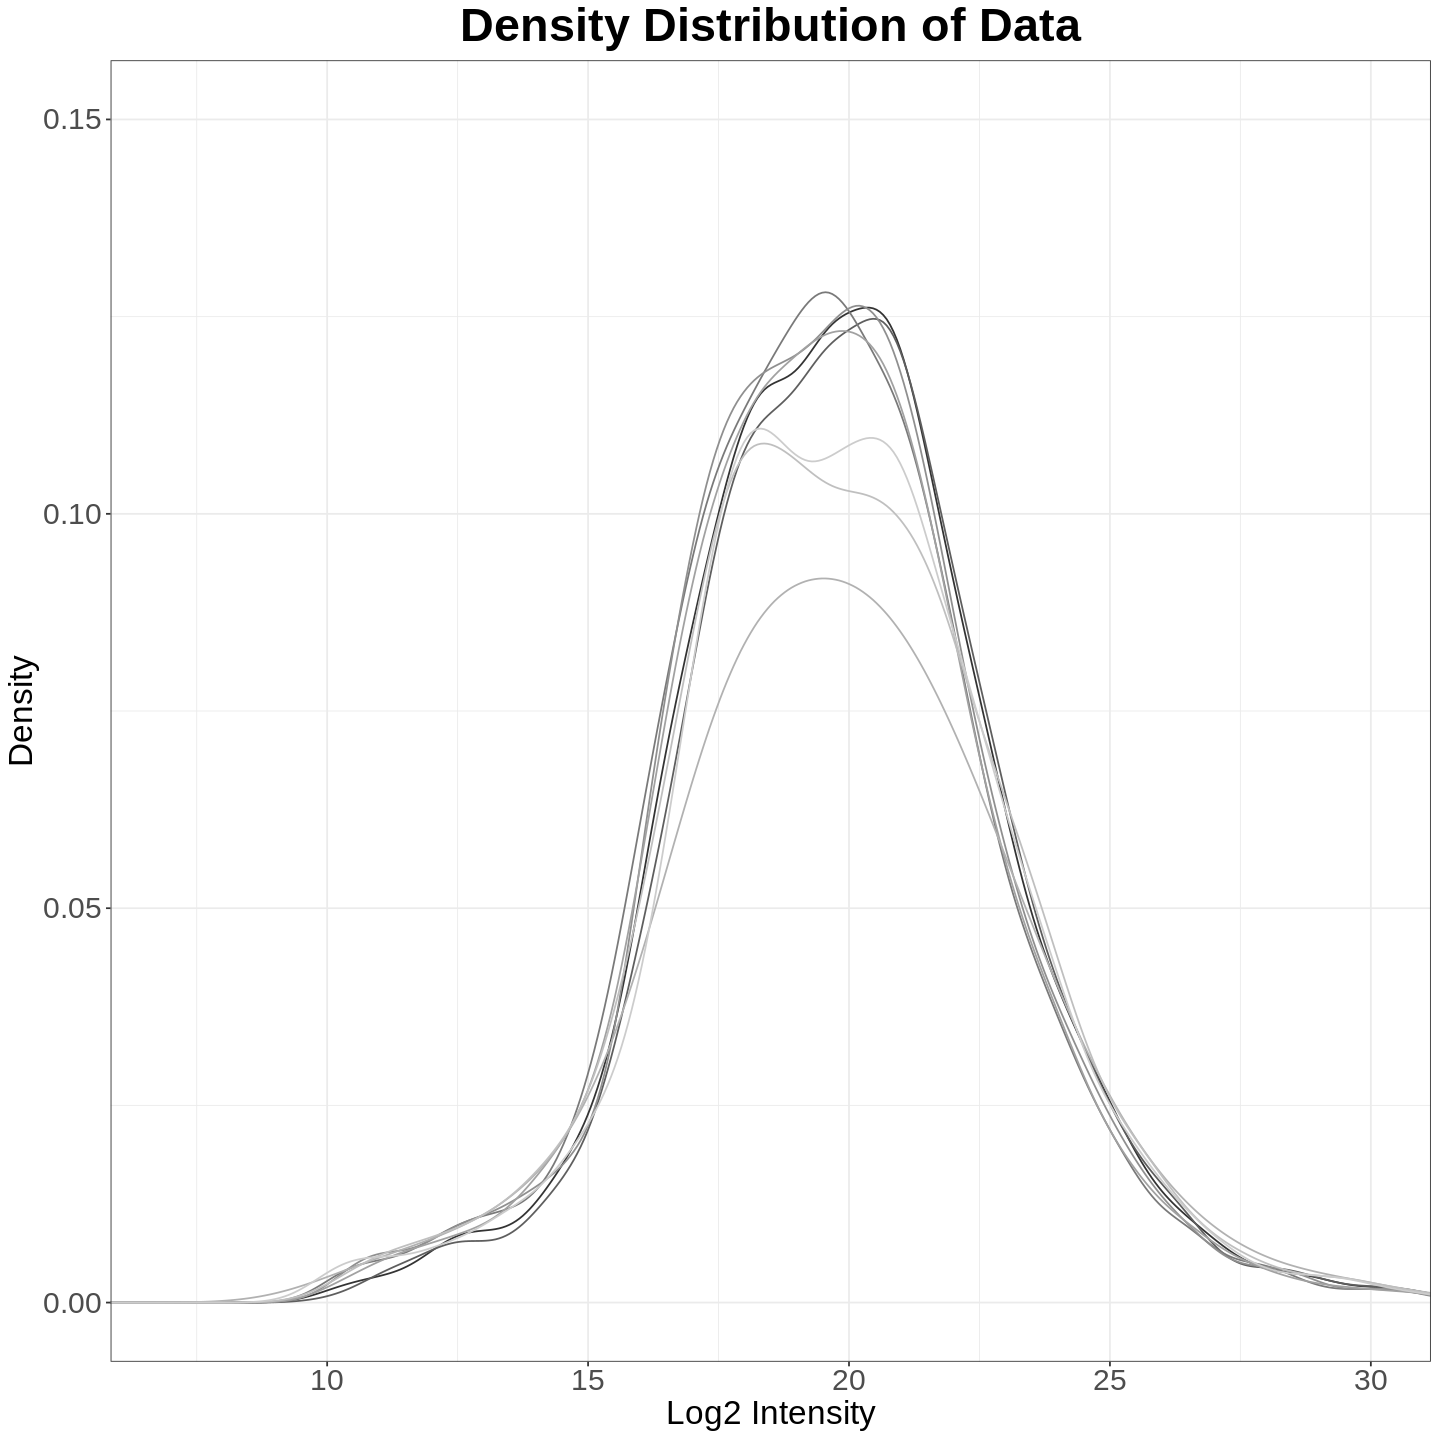

In [22]:
options(repr.plot.width=12, repr.plot.height=12, res=200)
suppressMessages(custom_density_plot(featab_df.log[,2:ncol(featab_df.log)], 
                                     y_lim_param=0.15))

### Mean TIC ACross Samples 

Input:

- data ; if nas ; willl be imputed for 0s within the function because we need to take into account the missing values in each sample to properly detect low intensity samples 
- optional ; metadata ; if present will factor color it ; if not then will not 


Note ; if x-axis need be changed for fontsize ; use   axis.title.x = element_text( size=16) in plotMeanTic function to control;

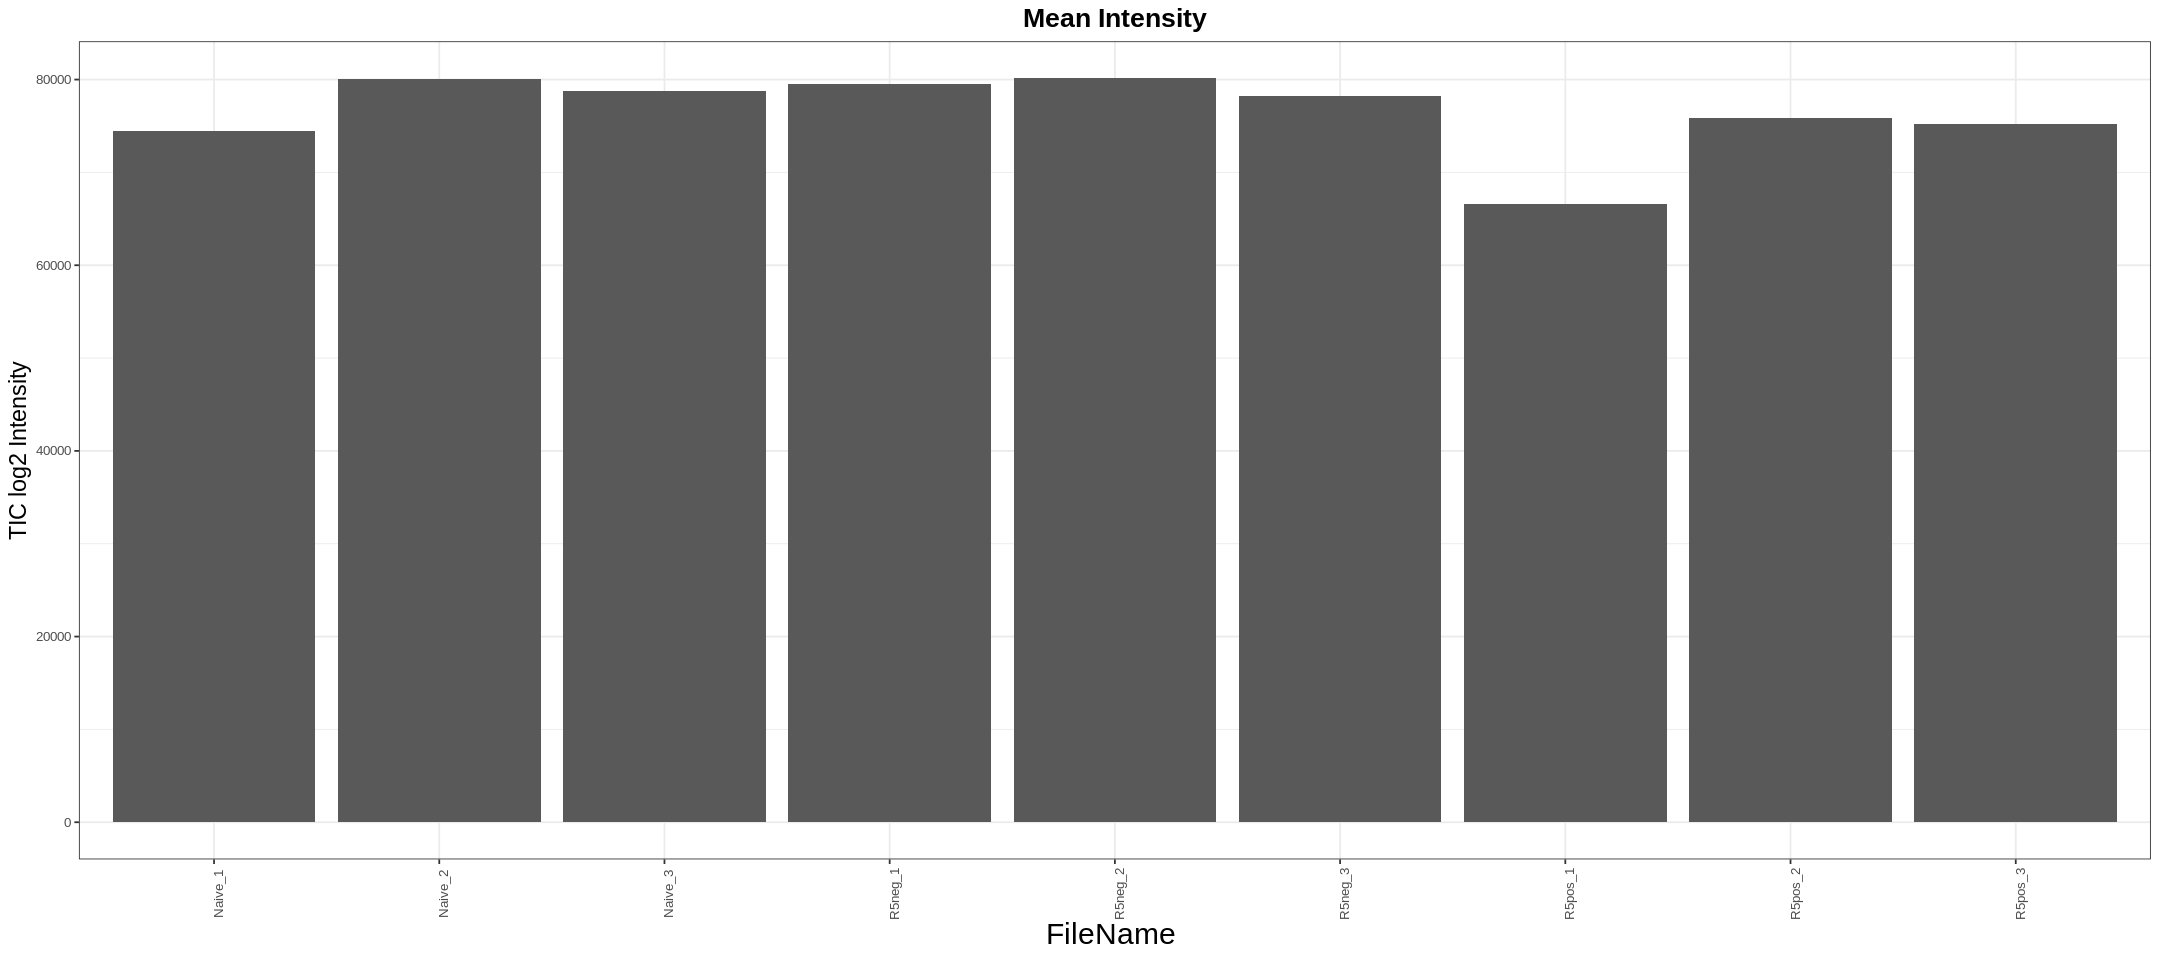

In [23]:
options(repr.plot.width=18, repr.plot.height=8, res=200)
suppressMessages(plotTIC(featab_df.log,meta_df,"tID","class"))
#control xaxis font size;axis.title.x = element_text( size=16)

## Decide SD cutoff for outliers by yourself if need be

In [24]:
get_TIC_outliers(featab_df.log,2)

,columnsum,Sample.ID
,<dbl>,<chr>
R5pos_1,66607,R5pos_1


### Missing values plot 

Input:

- logged 2/linear scale  data with nas ; no imputation happening in the function as i am counting Nas 


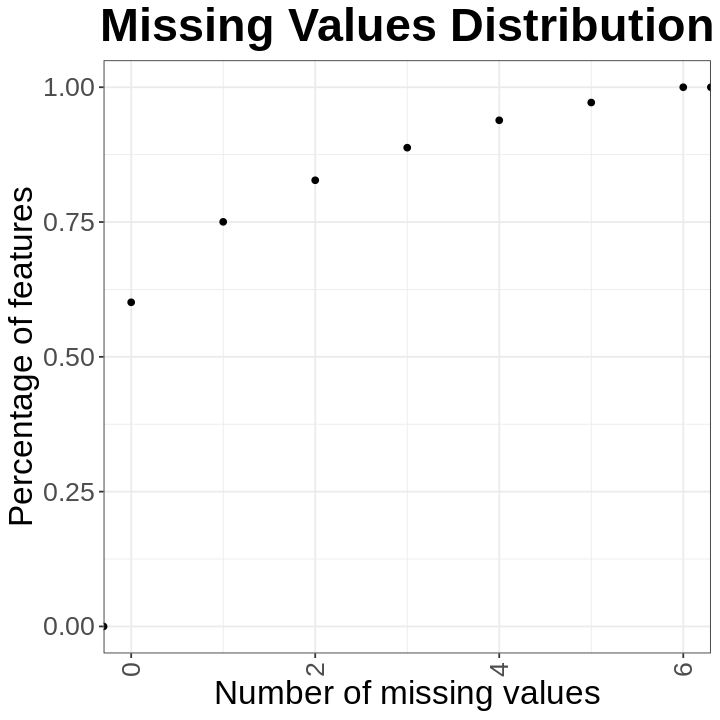

In [25]:
source('./utilis/utlis_MQC.R')
options(repr.plot.width=6, repr.plot.height=6, res=200)
plot_NA_cdf(featab_df.log, present_percentage = FALSE)

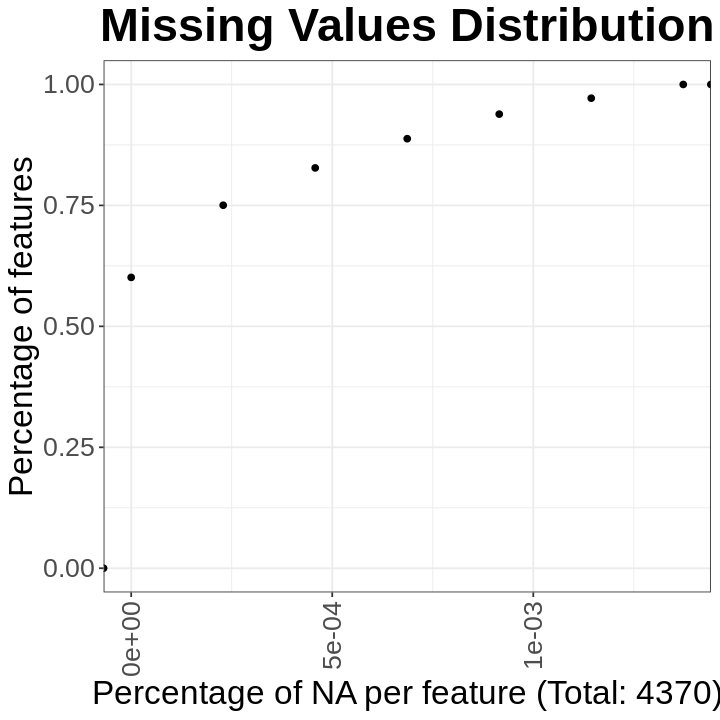

In [26]:
options(repr.plot.width=6, repr.plot.height=6, res=200)
plot_NA_cdf(featab_df.log, present_percentage = TRUE)

### Corelation bw samples 

In [27]:
# A function that help later step as correlation plot cannot handle very well with zero values
mssingValueAsNA <- TRUE # NA is good to skip this step
if (!mssingValueAsNA) {
    featab_df.log.NA <- featab_df.log
    featab_df.log.NA[featab_df.log == 0] <- NA  # Turn 0 into NA
    featab_df.log <- featab_df.log.NA
}

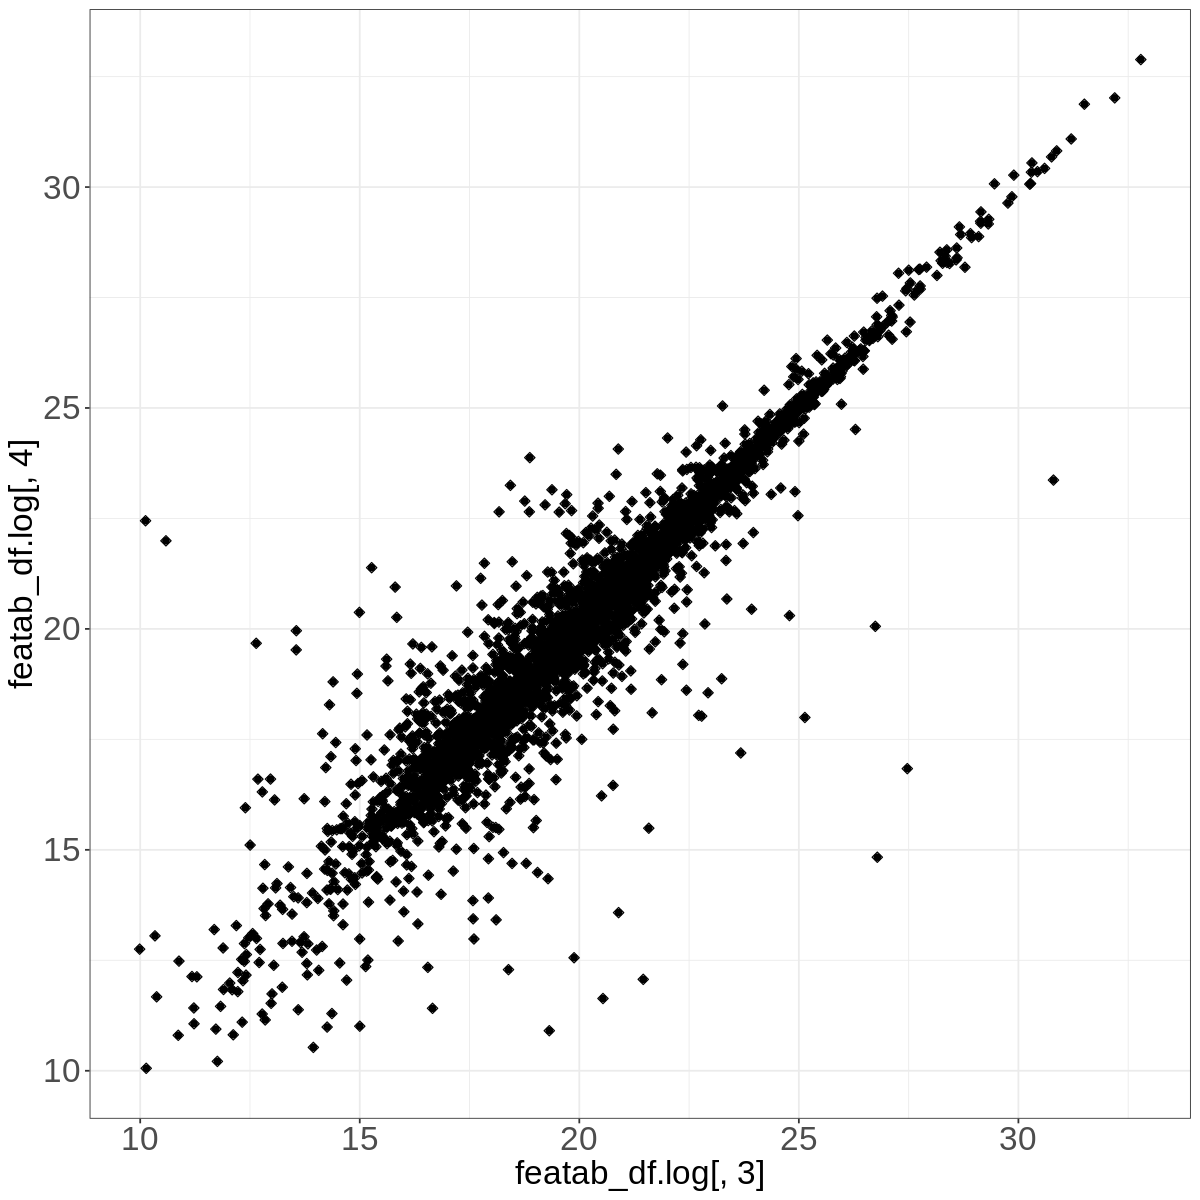

In [28]:
#options(repr.plot.width=16, repr.plot.height=20, res=200)
# reproducibility of injection replicates
#figure options ; change to the needs
options(repr.plot.width=10, repr.plot.height=10)
  ggplot(featab_df.log, aes(x=featab_df.log[,3], y=featab_df.log[,4])) + geom_point()+
  geom_point(size=2, shape=23) +# Change the point size, and shape
  theme_bw()+#axis settings 
    theme(axis.text=element_text(size=20))+
 #axis labels settings 
    theme(axis.title=element_text(size=20))

## Heatmap 

Input: 
- data; log2/linear scale data with nas 
- metadata is optional 
- metadata include what to colors.

WishList Note:  fix if metadata is not passed; debug

In [29]:
colnames(meta_df)

[1] "index"              "tID"                "Sample ID"         
[4] "tID_dedup"          "class"              "biological_samples"
[7] "cell_number"

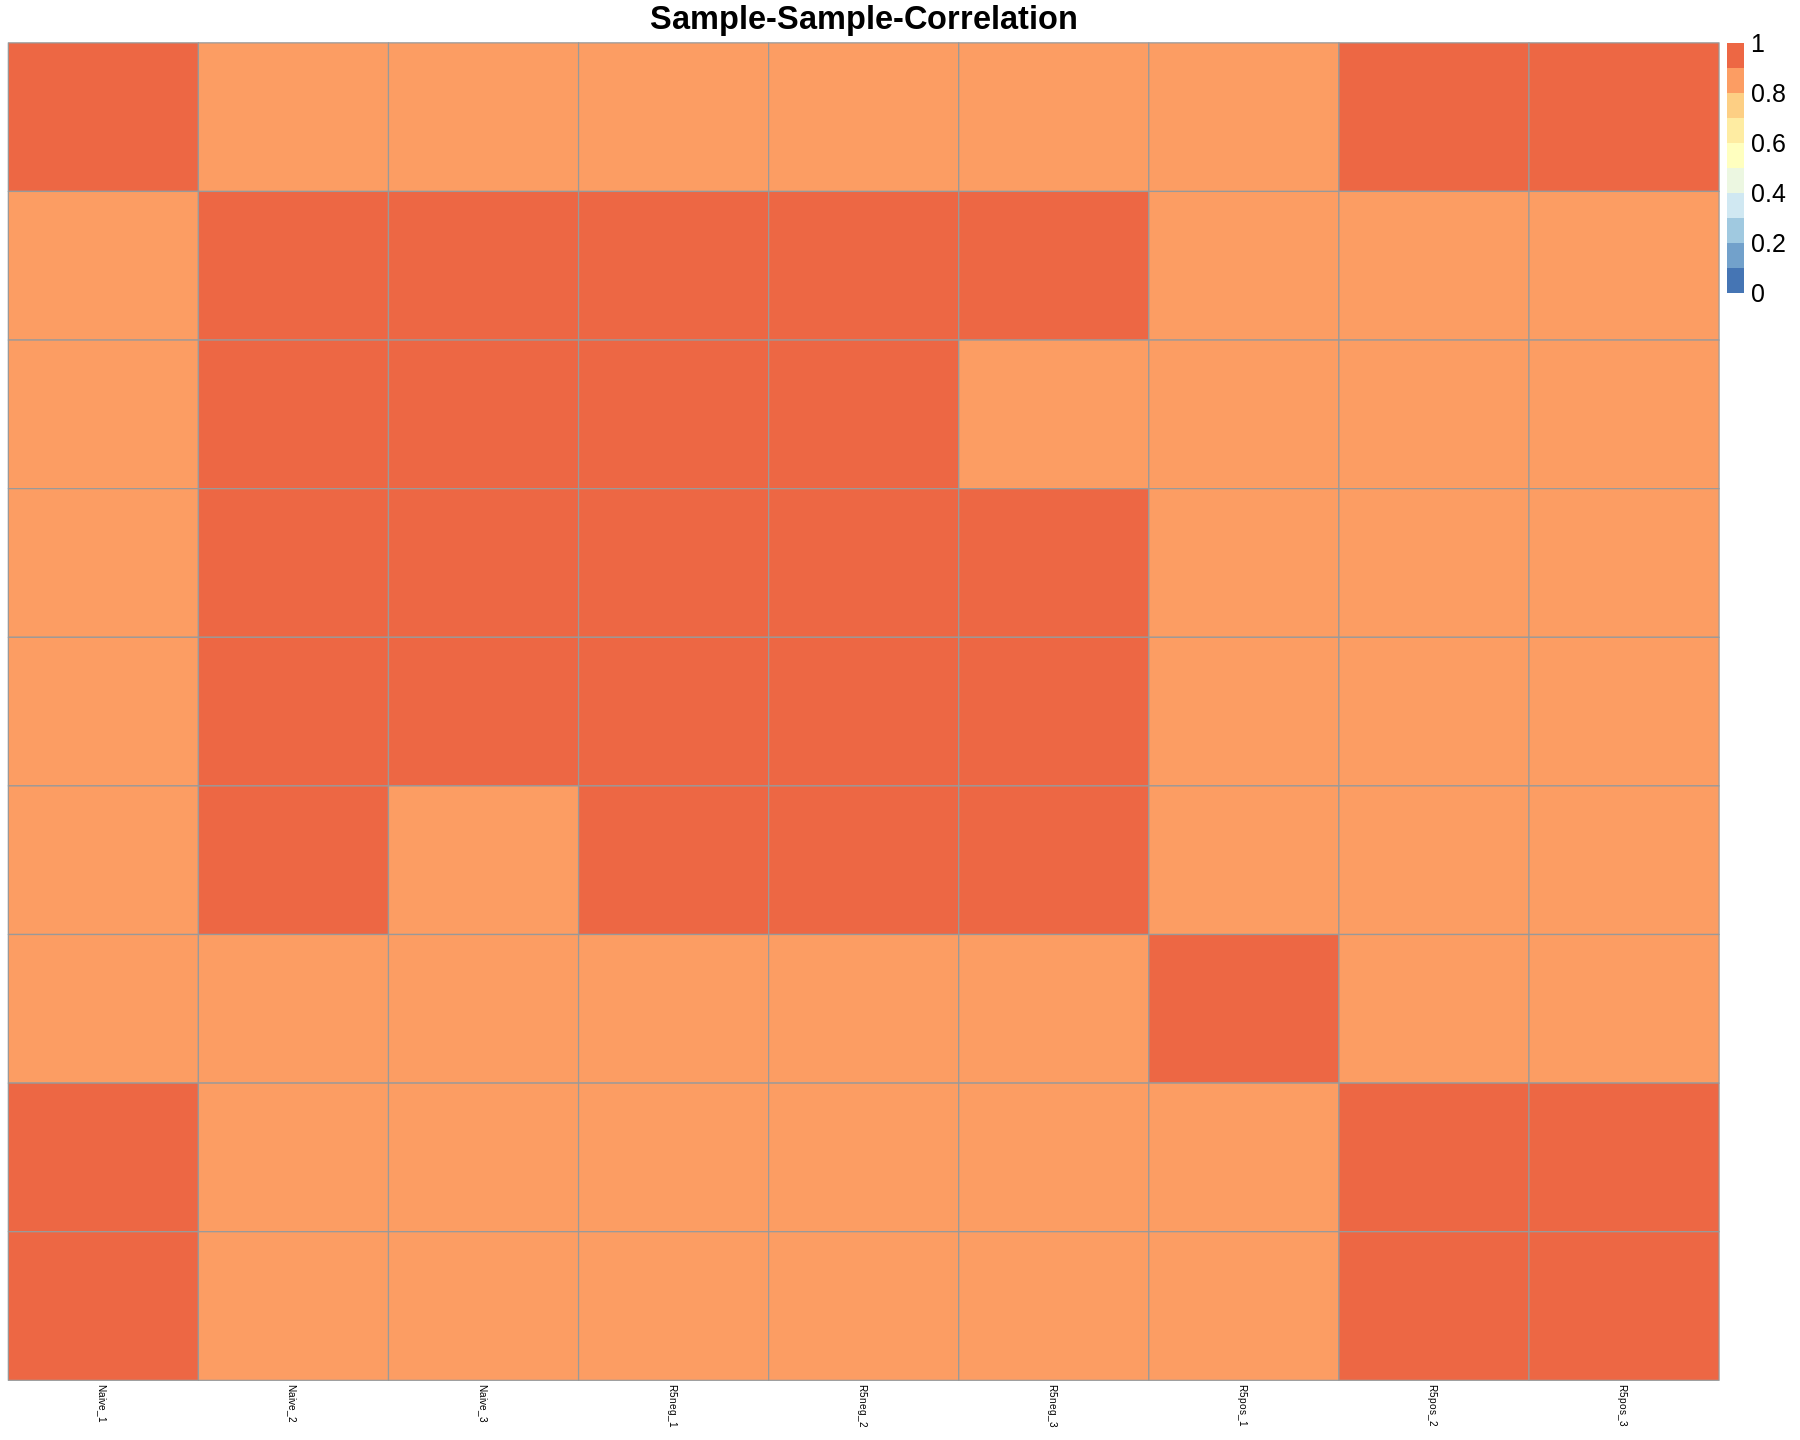

In [30]:
options(repr.plot.width=15, repr.plot.height=12, res=300)
suppressMessages(plot_heatmap(featab_df.log, meta_df, "Sample ID","class"))

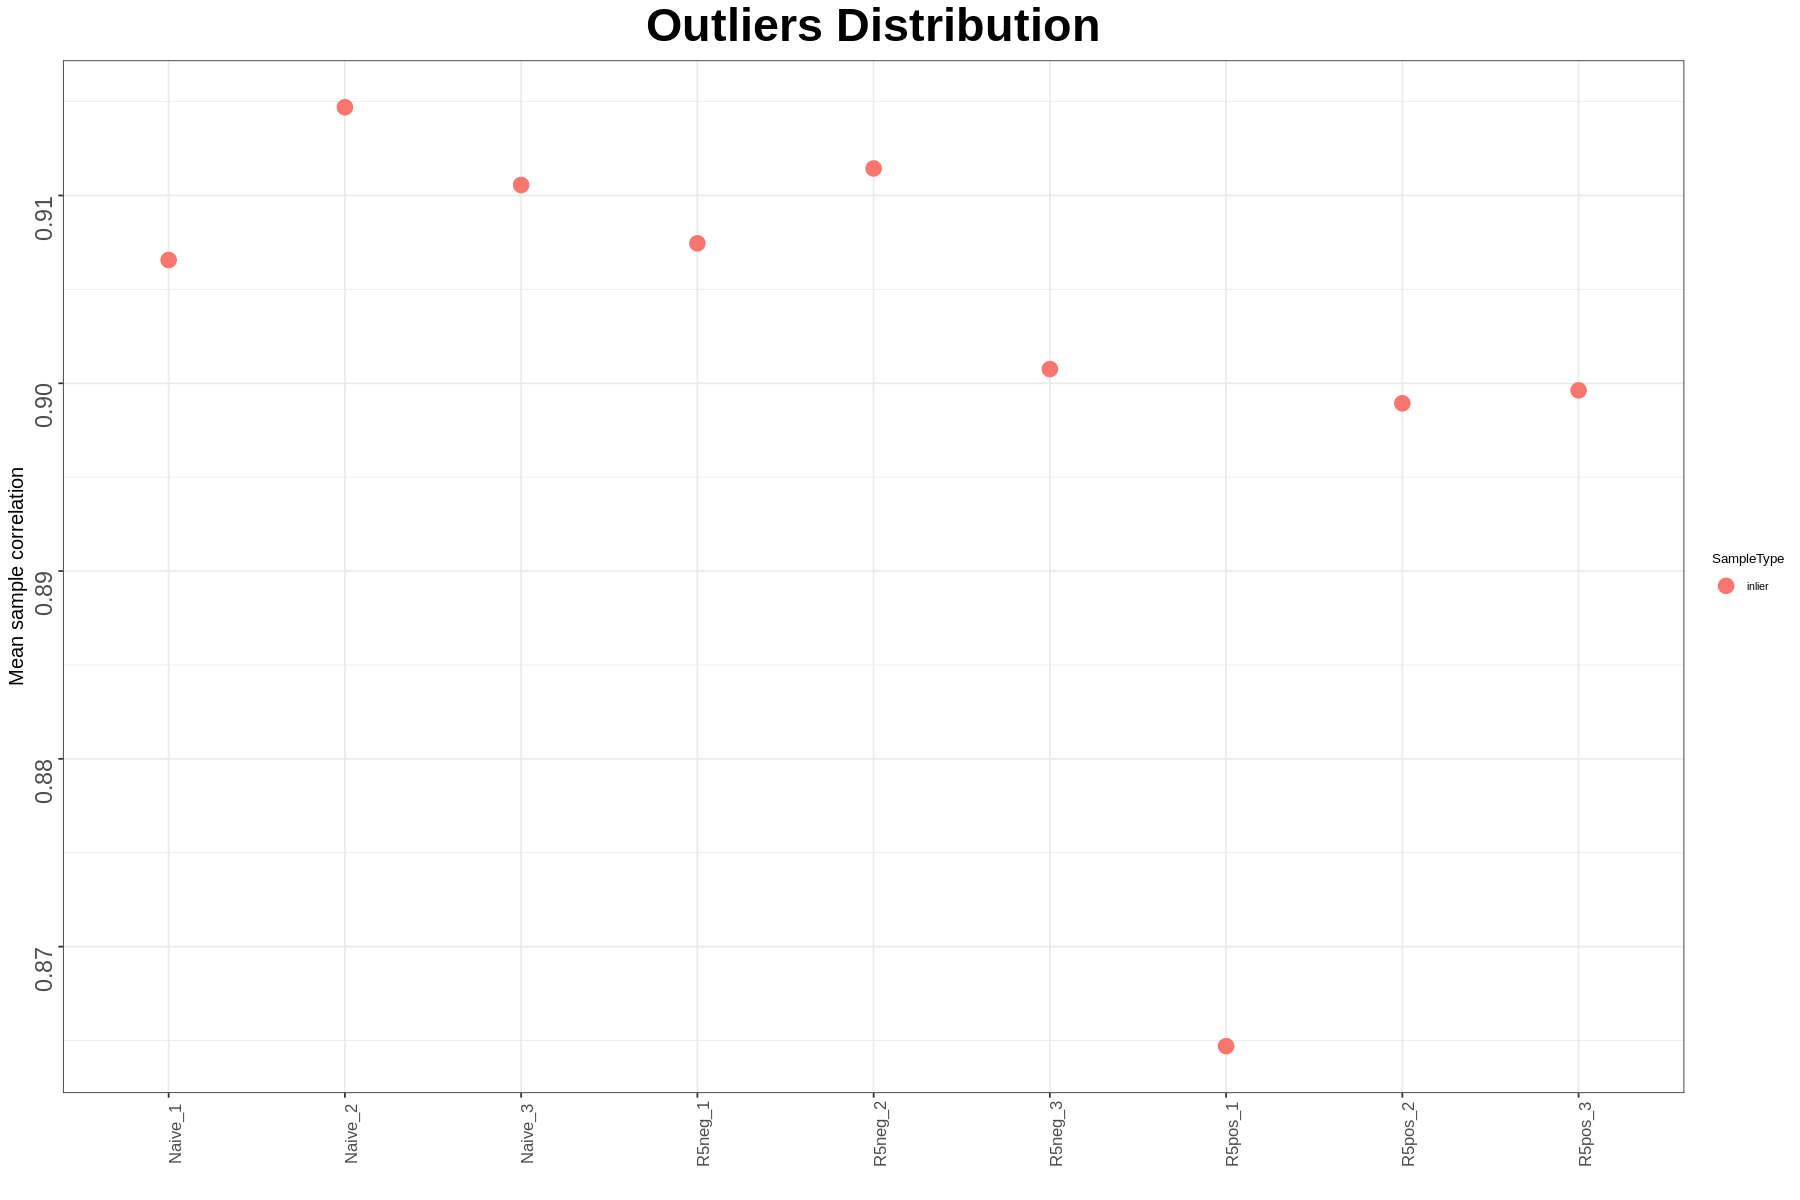

In [31]:
df.outliers <-  get_outliers_heatmap(featab_df.log)
options(repr.plot.width=15, repr.plot.height=10, res=300)
getoutliersplot(df.outliers)

In [46]:
filtered.df.outliers<-df.outliers %>% filter(SampleType=="outlier")
filtered.df.outliers

samples,columnmeancor,SampleType
<chr>,<dbl>,<chr>


# PCA

## Here if I use the unfiltered data

In [47]:
head(meta_df)

index,tID,Sample ID,tID_dedup,class,biological_samples,cell_number
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
19,R5pos_1,G2_R5pos_1_142_2,R5pos_1,R5pos,Yes,142
21,R5pos_2,G2_R5pos_2_200_2,R5pos_2,R5pos,Yes,200
23,R5pos_3,G2_R5pos_3_150_2,R5pos_3,R5pos,Yes,150
25,Naive_1,G1_Naive_1_300_2,Naive_1,Naive,Yes,300
27,Naive_2,G1_Naive_2_300_2,Naive_2,Naive,Yes,300
29,Naive_3,G1_Naive_3_300_2,Naive_3,Naive,Yes,300


Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(identifier)` instead of `identifier` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.
Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(columns4color)` instead of `columns4color` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.
Joining, by = "tID_dedup"
Too few points to calculate an ellipse

Too few points to calculate an ellipse



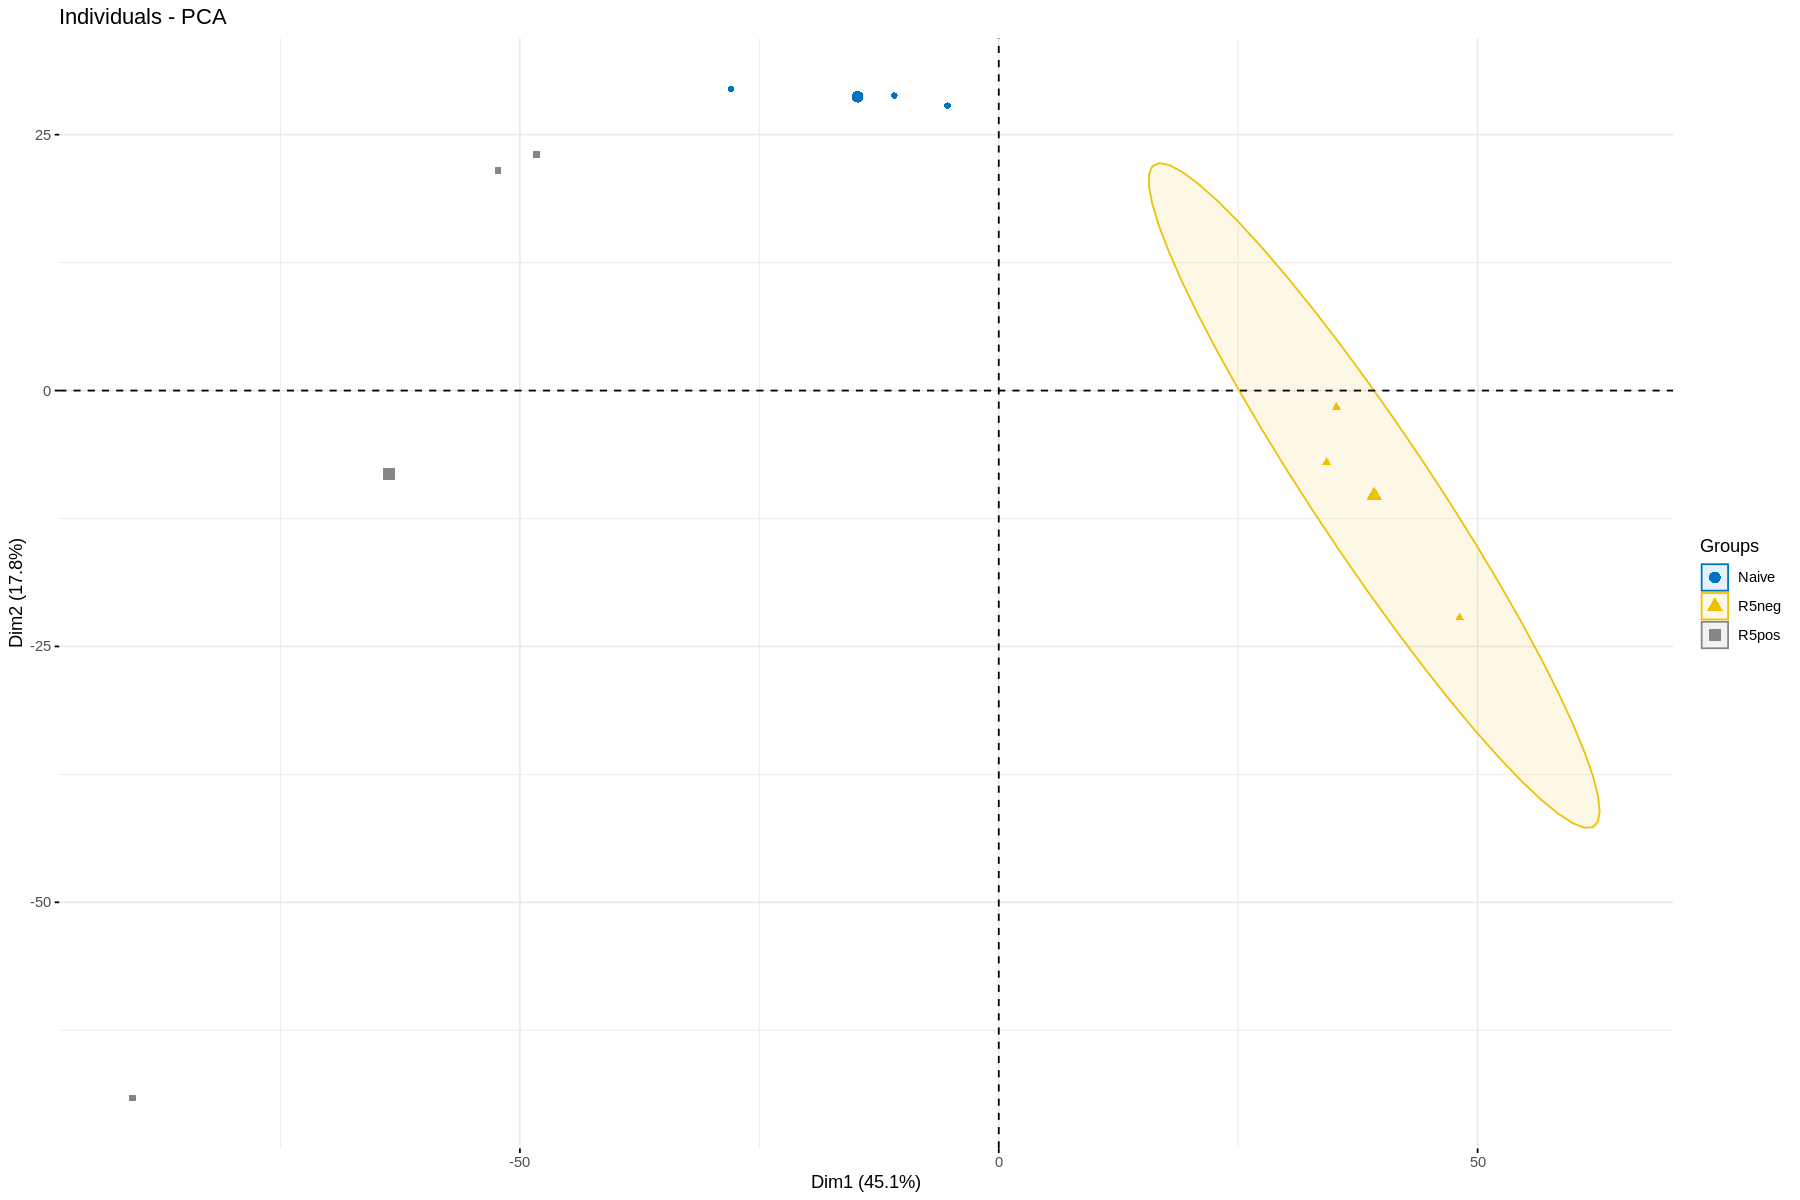

In [48]:
plotPCA(featab_df.log, meta_df, "tID_dedup", "class", TRUE)

## Here I will use the filtered

In [61]:
# filt_df <- read_csv(filtered_featab_path)

# filt_df = asari2data_feat_df(filt_df,'HEU\\_[0-9]+|HUU\\_[0-9]+')
# filt_df.log2 = log2transform(filt_df)

# ----

# colnames(meta_df)

# plotPCA(filt_df.log2, meta_df, "Sample.ID", "Group", TRUE)

------------

-----